## Set up

Libraries used

In [1]:
import ulmo
import rasterio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (5, 5)

Seeing what DEM resolution options we have through the `ulmo` package

In [2]:
ulmo.usgs.ned.get_available_layers()

['Alaska 2 arc-second', '1 arc-second', '1/3 arc-second', '1/9 arc-second']

Setting a bounding box of Denver; this is the scene will use to explore the DEMs

In [3]:
Denver_box = [-105.02500534057619, # min long
              39.70665840507515,   # min lat
              -104.94053184986116, # max long
              39.75220524821147]  # max lat

Defining a function to download the data, find the local file, import the DEM as a `numpy` array, view the histogram of elevation values, and, lastly, view the DEM

In [4]:
def view_Denver_DEM(arcsecond_value, remove_missing):
    
    download = ulmo.usgs.ned.get_raster(layer = arcsecond_value,
                                        bbox = Denver_box)
    
    for index in range(len(download['features'])):
        
        fi = download['features'][index]['properties']['file']
        with rasterio.open(fi, 'r') as src:
            DEM = src.read()
        print(DEM.shape)
        DEM_flat = DEM.ravel()
        real_lowest_value = np.unique(np.sort(DEM_flat))[1]
        
        if remove_missing:
            DEM_flat[DEM_flat == DEM_flat.min()] = real_lowest_value
            
        plt.hist(DEM_flat, bins = 500);
        plt.ioff()
        plt.show()
        plt.imshow(DEM_flat.reshape(DEM.shape).squeeze(), cmap = 'viridis')
        plt.ioff()
        plt.show();

## 1 arc-second Denver, CO DEMs

retrieving raster availability from https://www.sciencebase.gov/catalog/items?parentId=4f70aa71e4b058caae3f8de1&filter=tags%3DIMG&max=1000&fields=webLinks%2Cspatial%2Ctitle&format=json&filter=spatialQuery%3D%7Bwkt%3A%22POLYGON+%28%28-105.02500534057619+39.75220524821147%2C-105.02500534057619+39.70665840507515%2C-104.94053184986116+39.70665840507515%2C-104.94053184986116+39.75220524821147%2C-105.02500534057619+39.75220524821147%29%29%22%2Crelation%3A%22intersects%22%7D
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/IMG/USGS_NED_1_n40w106_IMG.zip
... ... zipfile saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aa71e4b058caae3f8de1/zip/USGS_NED_1_n40w106_IMG.zip
... ... .img format raster saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aa71e4b058caae3f8de1/USGS_NED_1_n40w106_IMG.img
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/IMG/USGS_NED_1_n40w105_IMG.zip
... ... zipfile saved 

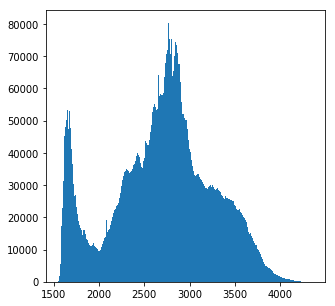

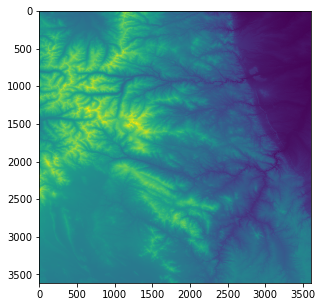

(1, 3612, 3612)


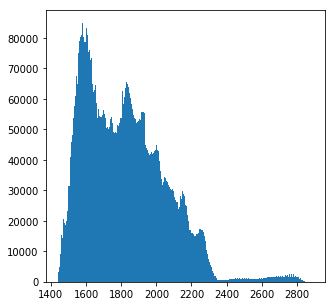

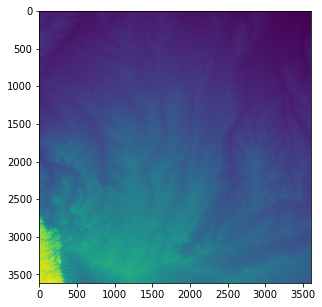

In [5]:
view_Denver_DEM('1 arc-second', False)

## 1/3 arc-second Denver, CO DEMs

retrieving raster availability from https://www.sciencebase.gov/catalog/items?parentId=4f70aa9fe4b058caae3f8de5&filter=tags%3DIMG&max=1000&fields=webLinks%2Cspatial%2Ctitle&format=json&filter=spatialQuery%3D%7Bwkt%3A%22POLYGON+%28%28-105.02500534057619+39.75220524821147%2C-105.02500534057619+39.70665840507515%2C-104.94053184986116+39.70665840507515%2C-104.94053184986116+39.75220524821147%2C-105.02500534057619+39.75220524821147%29%29%22%2Crelation%3A%22intersects%22%7D
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/IMG/USGS_NED_13_n40w106_IMG.zip
... ... zipfile saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aa9fe4b058caae3f8de5/zip/USGS_NED_13_n40w106_IMG.zip
... ... .img format raster saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aa9fe4b058caae3f8de5/USGS_NED_13_n40w106_IMG.img
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/IMG/USGS_NED_13_n40w105_IMG.zip
... ... zipfile 

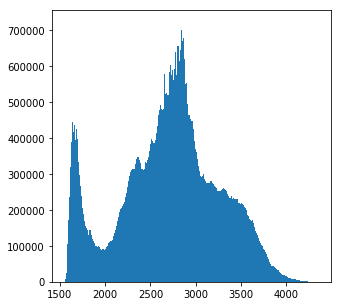

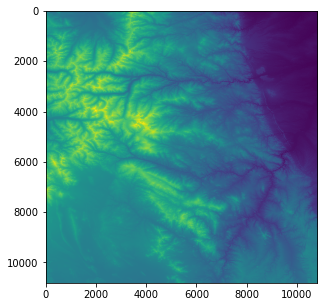

(1, 10812, 10812)


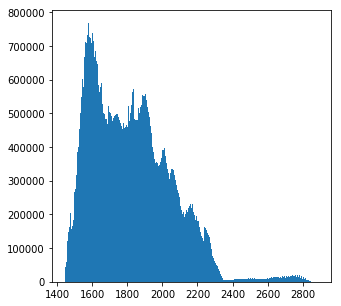

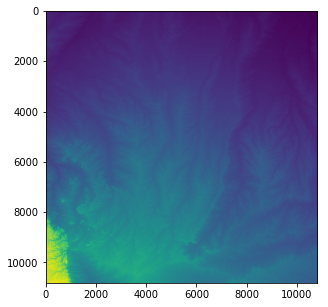

In [6]:
view_Denver_DEM('1/3 arc-second', False)

## 1/9 arc-second Denver, CO DEMs

retrieving raster availability from https://www.sciencebase.gov/catalog/items?parentId=4f70aac4e4b058caae3f8de7&filter=tags%3DIMG&max=1000&fields=webLinks%2Cspatial%2Ctitle&format=json&filter=spatialQuery%3D%7Bwkt%3A%22POLYGON+%28%28-105.02500534057619+39.75220524821147%2C-105.02500534057619+39.70665840507515%2C-104.94053184986116+39.70665840507515%2C-104.94053184986116+39.75220524821147%2C-105.02500534057619+39.75220524821147%29%29%22%2Crelation%3A%22intersects%22%7D
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/19/IMG/ned19_n40x00_w105x00_co_denvercity_2008.zip
... ... zipfile saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aac4e4b058caae3f8de7/zip/ned19_n40x00_w105x00_co_denvercity_2008.zip
... ... .img format raster saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aac4e4b058caae3f8de7/ned19_n40x00_w105x00_co_denvercity_2008.img
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/19/

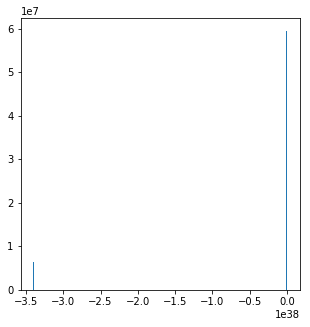

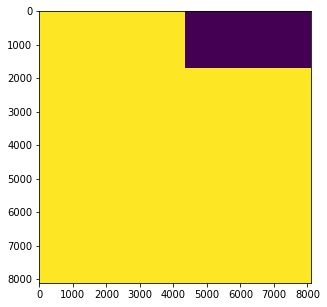

(1, 8112, 8112)


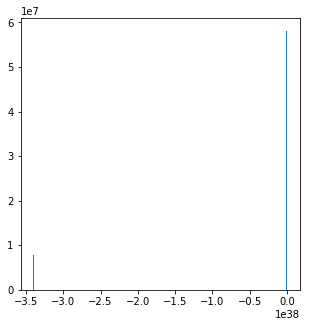

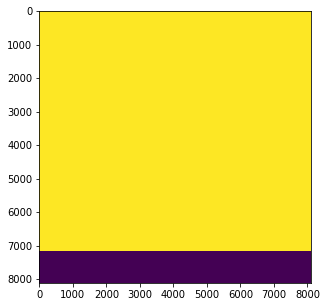

(1, 8112, 8112)


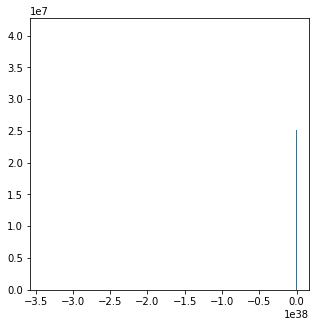

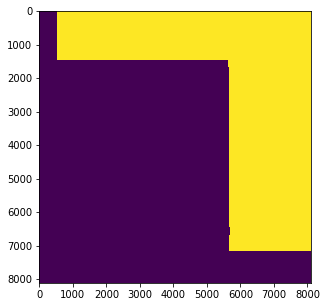

(1, 8112, 8112)


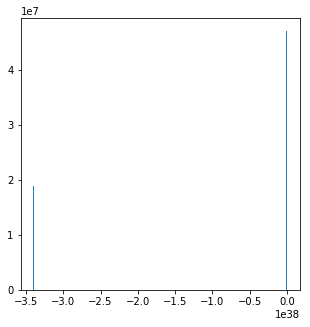

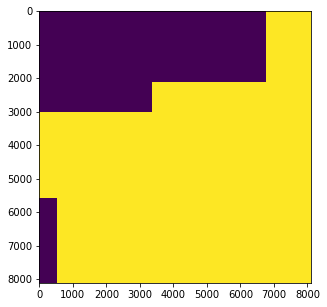

In [7]:
view_Denver_DEM('1/9 arc-second', False)

## 1/9 arc-second; resolving missing values

retrieving raster availability from https://www.sciencebase.gov/catalog/items?parentId=4f70aac4e4b058caae3f8de7&filter=tags%3DIMG&max=1000&fields=webLinks%2Cspatial%2Ctitle&format=json&filter=spatialQuery%3D%7Bwkt%3A%22POLYGON+%28%28-105.02500534057619+39.75220524821147%2C-105.02500534057619+39.70665840507515%2C-104.94053184986116+39.70665840507515%2C-104.94053184986116+39.75220524821147%2C-105.02500534057619+39.75220524821147%29%29%22%2Crelation%3A%22intersects%22%7D
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/19/IMG/ned19_n40x00_w105x00_co_denvercity_2008.zip
... ... zipfile saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aac4e4b058caae3f8de7/zip/ned19_n40x00_w105x00_co_denvercity_2008.zip
... ... .img format raster saved at /home/jeremydiaz/.local/share/ulmo/usgs/ned/4f70aac4e4b058caae3f8de7/ned19_n40x00_w105x00_co_denvercity_2008.img
... downloading tile 1 of 1 from https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/19/

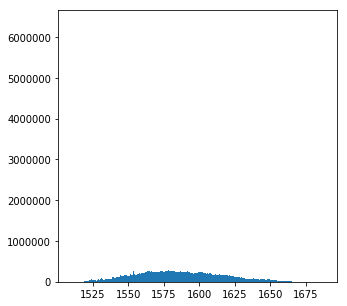

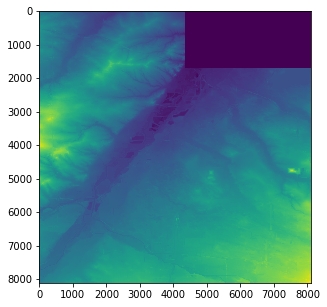

(1, 8112, 8112)


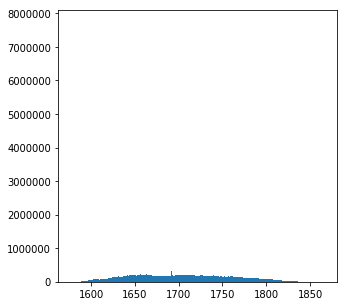

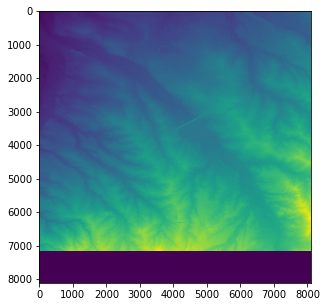

(1, 8112, 8112)


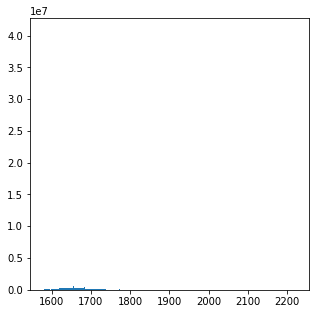

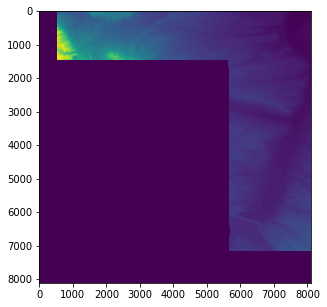

(1, 8112, 8112)


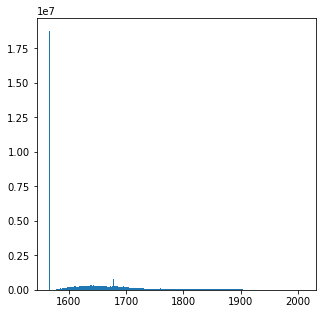

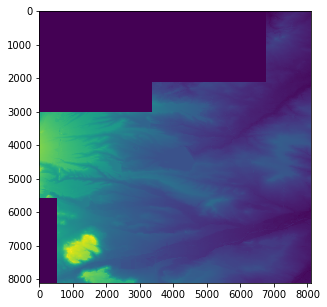

In [8]:
view_Denver_DEM('1/9 arc-second', True)